## System Prompt Analysis

Comparison of model ratings of commonsense statements in two settings:

- Default setting: no system prompt
- System prompt setting: with a system prompt that encourages the model act indepdently and not be influenced the user.


In [1]:
# Change to home directory
import os

os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json
import matplotlib

# Set default font to Arial
matplotlib.rcParams["font.family"] = "Arial"
matplotlib.rcParams["font.sans-serif"] = "Arial"

In [3]:
model_to_color = {
    "GPT-3.5": "forestgreen",
    "GPT-4-0125": "forestgreen",
    "GPT-4-0409": "forestgreen",
    "GPT-4o": "forestgreen",
    "GPT-5": "forestgreen",
    "LLaMA-2-7B": "indianred",
    "LLaMA-2-13B": "indianred",
    "LLaMA-2-70B": "indianred",
    "LLaMA-3-8B": "indianred",
    "LLaMA-3-70B": "indianred",
    "Flan-T5-Small": "royalblue",
    "Flan-T5-Base": "royalblue",
    "Flan-T5-Large": "royalblue",
    "Flan-T5-XL": "royalblue",
    "Flan-T5-XXL": "royalblue",
    "Gemma-2B": "chocolate",
    "Gemma-7B": "chocolate",
    "Gemini Pro 1.0": "chocolate",
    "Mistral-7B": "darkviolet",
    "Mixtral-8x7B": "darkviolet",
    "Mixtral-8x22B": "darkviolet",
    "Mistral-Large": "darkviolet",
    "OLMo-7B": "goldenrod",
    "Falcon-7B": "teal",
    "Falcon-40B": "teal",
    "Falcon-180B": "teal",
    "Claude 3 Haiku": "olivedrab",
    "Claude 3 Sonnet": "olivedrab",
    "Claude 3 Opus": "olivedrab",
    "DBRX": "crimson",
    "Qwen2-0.5B": "lightseagreen",
    "Qwen2-1.5B": "lightseagreen",
    "Qwen2-7B": "lightseagreen",
    "Qwen2-57B": "lightseagreen",
    "Qwen2-72B": "lightseagreen",
}

In [4]:
# Human ratings
# Do you agree with this statement?
individual = pd.read_csv("data/results/individual_ratings.csv", index_col=0)

# Do you think most people would agree with this statement?
group = pd.read_csv("data/results/group_ratings.csv", index_col=0)

# Majority voting (skip participants who didn't answer)
avg_vote_per_q = individual.mean(axis=1, skipna=True)
maj_i = (avg_vote_per_q >= 0.5).astype(int)

avg_vote_per_q_others = group.mean(axis=1, skipna=True)

# Majority of "others agree" answers by humans
maj_others = (group.mean(1, skipna=True) >= 0.5).astype(int)

In [5]:
# Load statements
statements = pd.read_csv("data/statements_and_prompts.csv")
statements = statements["statement"]

In [6]:
from src.utilities import load_annotations_gpt
from src.utilities import load_results_hf
from src.utilities import load_results_freq
from src.utilities import load_results_gpt5
from src.utilities import load_annotations_gpt_from_batch

all_models = {}

all_models["GPT-4o"] = load_annotations_gpt(
    model_name="gpt-4o-2024-05-13", trial_no=1, verbose=True
)
all_models["GPT-4o-with-system-prompt"] = load_annotations_gpt_from_batch(
    model_name="gpt-4o-2024-05-13-with-system-prompt", trial_no=1, verbose=True
)

all_models["GPT-3.5"] = load_annotations_gpt(
    model_name="gpt-3.5-turbo-0125", trial_no=1, verbose=True
)
all_models["GPT-3.5-with-system-prompt"] = load_annotations_gpt_from_batch(
    model_name="gpt-3.5-turbo-0125-with-system-prompt", trial_no=1, verbose=True
)

all_models["GPT-4-0409"] = load_annotations_gpt(
    model_name="gpt-4-turbo-2024-04-09", trial_no=1, verbose=True
)
all_models["GPT-4-0409-with-system-prompt"] = load_annotations_gpt_from_batch(
    model_name="gpt-4-turbo-2024-04-09-with-system-prompt", trial_no=1, verbose=True
)

# all_models["GPT-4-0125"] = load_annotations_gpt(model_name="gpt-4-0125-preview", trial_no=1, verbose=True)
# all_models["GPT-4-0125-with-system-prompt"] = load_annotations_gpt_from_batch(
#     model_name="gpt-4-0125-preview-with-system-prompt", trial_no=1, verbose=True)

In [7]:
# Model votes
def get_model_probs(model_name, q="q1"):

    q_answers = all_models[model_name][q]
    q_answers = q_answers[["yes", "no", "other"]]

    q_answers = q_answers.to_numpy()
    other = q_answers[:, 2]
    q_answers[:, 0] += other / 2
    q_answers[:, 1] += other / 2

    # Ignore probability mass of "other" option
    # Ensure that the probabilities of "yes" and "no" sum to 1
    q_answers = q_answers[:, 0:2]
    q_answers /= q_answers.sum(1, keepdims=True)

    q_answers = pd.DataFrame(q_answers, columns=["yes", "no"], index=individual.index)
    return q_answers

In [8]:
all_models_q1_probs = {}
for model_name in all_models.keys():
    all_models_q1_probs[model_name] = get_model_probs(model_name, "q1")

all_models_q2_probs = {}
for model_name in all_models.keys():
    all_models_q2_probs[model_name] = get_model_probs(model_name, "q2")

In [9]:
all_models_q1_probs

{'GPT-4o':            yes        no
 0     0.999997  0.000003
 1     0.622456  0.377544
 2     0.999993  0.000007
 3     0.974039  0.025961
 4     0.999839  0.000161
 ...        ...       ...
 4402  0.999797  0.000203
 4403  0.999992  0.000008
 4404  0.999998  0.000002
 4405  0.999984  0.000016
 4406  0.997187  0.002813
 
 [4407 rows x 2 columns],
 'GPT-4o-with-system-prompt':            yes            no
 0     1.000000  1.626727e-08
 1     0.999512  4.879012e-04
 2     1.000000  2.379858e-08
 3     1.000000  3.641540e-07
 4     1.000000  5.135644e-08
 ...        ...           ...
 4402  0.999998  2.336807e-06
 4403  0.974043  2.595742e-02
 4404  0.999999  1.242806e-06
 4405  1.000000  2.416185e-08
 4406  0.022977  9.770226e-01
 
 [4407 rows x 2 columns],
 'GPT-3.5':            yes        no
 0     0.999988  0.000012
 1     0.999968  0.000032
 2     0.999966  0.000034
 3     0.999763  0.000237
 4     0.998854  0.001146
 ...        ...       ...
 4402  0.904814  0.095186
 4403  0.99845

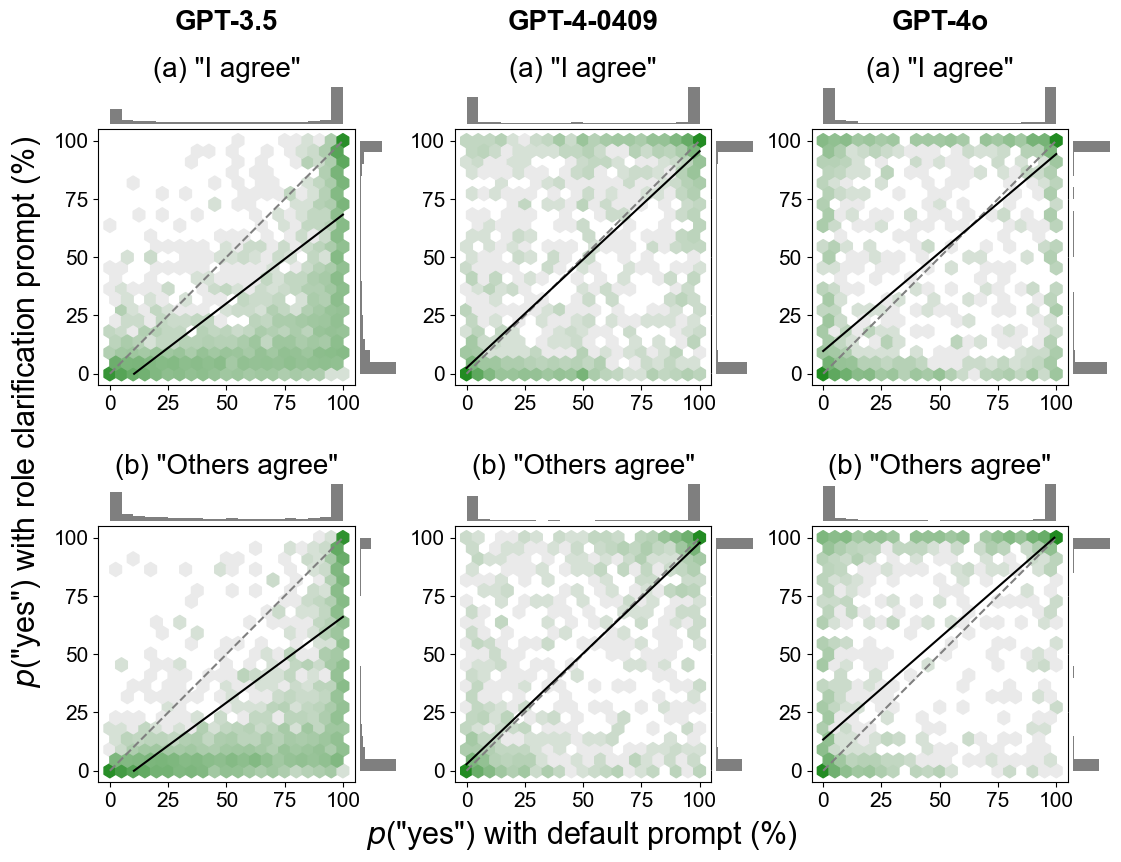

In [10]:
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import r2_score
import re
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from tqdm import tqdm

model_name = "GPT-4-0409"

fig, axes = plt.subplots(2, 3, figsize=(11, 8))

num_bins = 20

for i, model_name in enumerate(["GPT-3.5", "GPT-4-0409", "GPT-4o"]):
    for j in range(2):
        if j % 2 == 0:
            x = all_models_q1_probs[model_name]["yes"] * 100
            y = all_models_q1_probs[model_name + "-with-system-prompt"]["yes"] * 100
        else:
            x = all_models_q2_probs[model_name]["yes"] * 100
            y = all_models_q2_probs[model_name + "-with-system-prompt"]["yes"] * 100

        ax = axes[j, i]
        ax.set_aspect("equal")
        color = matplotlib.colors.colorConverter.to_rgba("black", alpha=0.05)

        # ax.scatter(x, y, color=color, edgecolors=color)
        colors = [
            np.array((235, 235, 235)) / 256,  # RGB values for gray
            model_to_color[model_name],
        ]
        custom_cmap = LinearSegmentedColormap.from_list("gray_orange", colors)

        hb = ax.hexbin(
            x=x,
            y=y,
            C=None,
            gridsize=num_bins,
            mincnt=1,
            cmap=custom_cmap,
            xscale="linear",
            yscale="linear",
            bins="log",
            vmin=1,
            vmax=1000,
            extent=(0, 100, 0, 100),
            marginals=False,
        )

        ax_histx = ax.inset_axes([0, 1.02, 1, 0.15], sharex=ax)
        ax_histy = ax.inset_axes([1.02, 0, 0.15, 1], sharey=ax)

        bars, ints = np.histogram(x, bins=np.linspace(0, 100, num=num_bins + 1))
        ints = [np.mean([ints[i], ints[i + 1]]) for i in range(len(ints) - 1)]
        bars = bars / bars.sum()
        ax_histx.bar(ints, bars, width=(100 / num_bins) * 1, color=color, alpha=0.5)
        sns.despine(ax=ax_histx, top=True, bottom=True, left=True, right=True)
        ax_histx.set_yticks([])
        ax_histx.tick_params(size=0, labelbottom=False, axis="both")

        bars, ints = np.histogram(y, bins=np.linspace(0, 100, num=num_bins + 1))
        ints = np.array([np.mean([ints[i], ints[i + 1]]) for i in range(len(ints) - 1)])
        bars = bars / bars.sum()

        ax_histy.barh(ints, bars, height=(100 / num_bins) * 1, color="k", alpha=0.5)
        sns.despine(ax=ax_histy, top=True, bottom=True, left=True, right=True)
        # ax_histy.set_yticks([])
        ax_histy.tick_params(size=0, labelbottom=False, axis="both")
        ax_histy.tick_params(
            size=0, labelbottom=False, axis="both", labelsize=0, labelcolor="w"
        )

        ax.set_yticks([0, 25, 50, 75, 100])
        ax.set_yticklabels([0, 25, 50, 75, 100], fontsize=15)
        ax.set_xticks([0, 25, 50, 75, 100])
        ax.set_xticklabels([0, 25, 50, 75, 100], fontsize=15)

        ax.plot([0, 100], [0, 100], ls="--", color="gray", alpha=1)
        # Get parameters of best fit line
        slope, intercept = np.polyfit(x, y, 1)
        # plot from xmin so that y doesn't go negative
        xmin = max(0, -intercept / slope) if slope != 0 else 0
        xmax = min(100, (100 - intercept) / slope) if slope != 0 else 100

        def f_x(x):
            return slope * x + intercept

        ax.plot([xmin, xmax], [f_x(xmin), f_x(xmax)], ls="-", color="black", alpha=1)

        if j == 0:
            ax.text(
                x=50,
                y=145,
                s=model_name,
                ha="center",
                va="bottom",
                fontsize=20,
                fontweight="bold",
            )
            ax.text(
                x=50, y=125, s='(a) "I agree"', ha="center", va="bottom", fontsize=20
            )
            # ax.set_title(f'{model_name}\n(a) "I agree"', fontsize=20)
        else:
            ax.text(
                x=50,
                y=125,
                s=f'(b) "Others agree"',
                ha="center",
                va="bottom",
                fontsize=20,
            )

fig.text(
    x=0.5,
    y=-0.03,
    s='$p$("yes") with default prompt (%)',
    ha="center",
    va="center",
    fontsize=22,
)
fig.text(
    x=-0.005,
    y=0.5,
    s='$p$("yes") with role clarification prompt (%)',
    ha="center",
    va="center",
    rotation=90,
    fontsize=22,
)

fig.tight_layout(w_pad=0, h_pad=5)

plt.savefig("figures/system_prompt_calibration.pdf", bbox_inches="tight")
plt.show()

## Individual common sense


In [11]:
# Human ratings
# Do you agree with this statement?
individual = pd.read_csv("data/results/individual_ratings.csv", index_col=0)

# Do you think most people would agree with this statement?
group = pd.read_csv("data/results/group_ratings.csv", index_col=0)

# Majority voting (skip participants who didn't answer)
avg_vote_per_q = individual.mean(axis=1, skipna=True)
maj_i = (avg_vote_per_q >= 0.5).astype(int)

# Majority of "others agree" answers by humans
maj_others = (group.mean(1, skipna=True) >= 0.5).astype(int)

In [12]:
# Person: consensus
C_j = pd.Series(
    [
        (
            individual.loc[:, j].dropna().astype(int)
            == maj_i.loc[individual.loc[:, j].dropna().index]
        ).mean()
        for j in individual.columns
    ],
    index=individual.columns,
)

# Person: awareness
A_j = pd.Series(
    [
        (
            group.loc[:, j].dropna().astype(int)
            == maj_i.loc[group.loc[:, j].dropna().index]
        ).mean()
        for j in group.columns
    ],
    index=group.columns,
)

# Person: commonsensicality
M_j = np.sqrt(C_j * A_j)

In [13]:
def get_binary_answers(q_answers):
    assert q_answers.columns[0].lower() == "yes"
    assert q_answers.columns[1].lower() == "no"
    if len(q_answers.columns) > 2:
        assert q_answers.columns[2].lower() == "other"

    # Remove the "other" answer and rescale so "yes" + "no" = 1
    q_answers = q_answers.to_numpy()
    other = q_answers[:, 2]
    q_answers[:, 0] += other / 2
    q_answers[:, 1] += other / 2
    q_answers = q_answers[:, 0:2]
    q_answers /= q_answers.sum(1, keepdims=True)

    # Get the answer with the highest probability
    q_answers = q_answers.argmax(axis=1)

    # Revert the ordering so that No = 0, Yes = 1
    # (Previously, no = 1, yes = 0)
    q_answers = 1 - q_answers

    return q_answers

In [14]:
from sklearn.metrics import accuracy_score


def compute_commonsensicality(answers, binary=False, return_ca=False):
    q1_answers = answers["q1"]
    if not binary:
        q1_answers = get_binary_answers(q1_answers)

    q2_answers = answers["q2"]
    if not binary:
        q2_answers = get_binary_answers(q2_answers)

    consensus = accuracy_score(y_true=maj_i, y_pred=q1_answers)
    awareness = accuracy_score(y_true=maj_i, y_pred=q2_answers)

    commonsensicality = np.sqrt(consensus * awareness)

    if return_ca:
        return consensus, awareness, commonsensicality

    return commonsensicality

In [15]:
# Commonsensicality for all models
all_model_comm = {}
all_model_cons = {}
all_model_awar = {}
for model_name, model_answers in all_models.items():
    con, awe, com = compute_commonsensicality(model_answers, return_ca=True)
    all_model_comm[model_name] = com
    all_model_awar[model_name] = awe
    all_model_cons[model_name] = con

In [16]:
all_model_comm

{'GPT-4o': np.float64(0.7516181113526245),
 'GPT-4o-with-system-prompt': np.float64(0.8126688670209726),
 'GPT-3.5': np.float64(0.7684212590476057),
 'GPT-3.5-with-system-prompt': np.float64(0.63746581289845),
 'GPT-4-0409': np.float64(0.8057801400622315),
 'GPT-4-0409-with-system-prompt': np.float64(0.8212297642273972)}

## Group common sense


In [17]:
# Statement: consensus
c_i = 2 * np.abs(individual.mean(1) - 0.5)

# Statement: awareness
a_i = pd.Series(
    [(group.loc[i].dropna().astype(int) == maj_i[i]).mean() for i in maj_i.index],
    index=maj_i.index,
)

# Statement: commonsensicality
m_i = np.sqrt(c_i * a_i)

In [18]:
def get_probs(q_answers):
    q_answers = q_answers[["yes", "no", "other"]]

    q_answers = q_answers.to_numpy()
    other = q_answers[:, 2]
    q_answers[:, 0] += other / 2
    q_answers[:, 1] += other / 2
    q_answers = q_answers[:, 0:2]
    q_answers /= q_answers.sum(1, keepdims=True)

    q_answers = pd.DataFrame(q_answers, columns=["yes", "no"], index=individual.index)
    return q_answers

In [19]:
def statement_comm(model_name):
    q1 = get_probs(all_models[model_name]["q1"])
    q2 = get_probs(all_models[model_name]["q2"])

    consensus = 2 * np.abs(q1["yes"] - 0.5) * 100

    awareness = np.where(q1["yes"] >= 0.5, q2["yes"], q2["no"]) * 100
    commonsensicality = np.sqrt(consensus * awareness)
    return np.array(consensus), np.array(awareness), np.array(commonsensicality)

In [20]:
statement_comm_all = pd.DataFrame(
    [],
    columns=["consensus", "awareness", "commonsensicality"],
    index=["Humans"] + sorted(all_models.keys()),
)
statement_comm_all.loc["Humans", "consensus"] = np.array(c_i) * 100
statement_comm_all.loc["Humans", "awareness"] = np.array(a_i) * 100
statement_comm_all.loc["Humans", "commonsensicality"] = np.array(m_i) * 100

for model_name in all_models.keys():
    consensus, awareness, commonsensicality = statement_comm(model_name)
    statement_comm_all.loc[model_name, "consensus"] = consensus
    statement_comm_all.loc[model_name, "awareness"] = awareness
    statement_comm_all.loc[model_name, "commonsensicality"] = commonsensicality

In [21]:
statement_comm_all

,consensus,awareness,commonsensicality
Humans,"[100.0, 33.33333333333333, 100.0, 100.0, 100.0...","[100.0, 66.66666666666666, 95.45454545454545, ...","[100.0, 47.14045207910316, 97.70084209183945, ..."
GPT-3.5,"[99.99761280180905, 99.99185155365747, 99.9919...","[99.99853871572019, 99.99593987168865, 99.9789...","[99.99807575769296, 99.99389569177885, 99.9854..."
GPT-3.5-with-system-prompt,"[99.99898347476778, 99.92442486367167, 99.9572...","[99.99762172947756, 99.7191544317812, 99.96467...","[99.9983025998047, 99.82173688374388, 99.96098..."
GPT-4-0409,"[99.99912839349876, 62.57225879107542, 99.9511...","[99.99740375489816, 94.9453087630672, 99.99146...","[99.99826607048043, 77.07750924180932, 99.9713..."
GPT-4-0409-with-system-prompt,"[99.99970618139868, 13.075570502775236, 99.996...","[99.99982241127671, 93.69470760744973, 99.9996...","[99.9997642963208, 35.00159646442031, 99.99820..."
GPT-4o,"[99.99876298534349, 24.4906750748086, 99.99736...","[99.99997397203086, 99.99982305603113, 99.9989...","[99.99936847685404, 49.488010406598605, 99.998..."
GPT-4o-with-system-prompt,"[99.99999390532336, 99.9024108372527, 99.99999...","[99.99999923660997, 99.9999783889797, 99.99999...","[99.99999657096663, 99.95118270802122, 99.9999..."


In [22]:
from scipy.stats import pearsonr

for model_name in all_models.keys():
    statement_comm_model = statement_comm_all.loc[model_name, "commonsensicality"]
    statement_comm_human = statement_comm_all.loc["Humans", "commonsensicality"]
    res = pearsonr(statement_comm_model, statement_comm_human, alternative="two-sided")
    print(f"{model_name}: r = {res.statistic:.2f}, p = {res.pvalue:.2f}")

GPT-4o: r = 0.13, p = 0.00
GPT-4o-with-system-prompt: r = 0.20, p = 0.00
GPT-3.5: r = 0.33, p = 0.00
GPT-3.5-with-system-prompt: r = 0.09, p = 0.00
GPT-4-0409: r = 0.24, p = 0.00
GPT-4-0409-with-system-prompt: r = 0.20, p = 0.00
